## Importing Libraries

In [2]:
# dataset link https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
# !pip install tensorflow
# !pip install pandas
# !pip install seaborn
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training image preprocessing

In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)#https://keras.io/api/data_loading/image/
#labels are given inferred, which means that I want the labels too be the same as that of the folder name
#if shuffle(shuffles all the images from all the directories) is set to True, it reduces the biases
#batch size shows the speed of processing, if it is 64 instead of 32, it speeds more

Found 70295 files belonging to 38 classes.


### validation image preprocessing

In [4]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

### To avoid overshooting
1. Choose small learning, default is 0.001 rate we are taking 0.0001
2. There may be chance of underfitting, so increase the number of neurons
3. Add more convolution layer to extract more features from images there may be possiblity that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [58]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [59]:
model=Sequential()

## Building Convolutional Layer

In [60]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))#32 filters on the image of size 128, 128
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))# 64 filters
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu')) #128 filters
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))# 256 filters
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))# 256 filters
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
model.add(Dropout(0.25))
#what ever number of layers are created, dropout 25% of them, to avoid the overfitting of layers

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500, activation='relu'))##hidden layers

In [17]:
model.add(Dropout(0.4))

In [18]:
### Output layer
model.add(Dense(units=38, activation='softmax'))##we have 38 classes

### Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001)
, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [21]:
training_history=model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2402s 1s/step - accuracy: 0.3918 - loss: 2.1731 - val_accuracy: 0.8232 - val_loss: 0.5534
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2319s 1s/step - accuracy: 0.8313 - loss: 0.5255 - val_accuracy: 0.9031 - val_loss: 0.3054
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2067s 941ms/step - accuracy: 0.9061 - loss: 0.2988 - val_accuracy: 0.9148 - val_loss: 0.2701
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2295s 1s/step - accuracy: 0.9341 - loss: 0.2003 - val_accuracy: 0.9284 - val_loss: 0.2411
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2313s 1s/step - accuracy: 0.9484 - loss: 0.1542 - val_accuracy: 0.9434 - val_loss: 0.1804
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2674s 1s/step - accuracy: 0.9629 - loss: 0.1105 - val_accuracy: 0.9585 - val_loss: 0.1346
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2174s 989ms/step - accuracy: 0.9682 - loss: 0.0939 - val_accuracy: 0.9599 - val_loss: 0.1337
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2575s 1s/step - accuracy: 0.

### Model Evaluation

In [22]:
#Model evaluation on training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 544s 247ms/step - accuracy: 0.9922 - loss: 0.0233


In [23]:
print(train_loss, train_acc)

0.020681733265519142 0.992830216884613


In [24]:
# Model on validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 136s 246ms/step - accuracy: 0.9685 - loss: 0.1162


In [25]:
print(val_loss, val_acc)

0.11464659124612808 0.9684156775474548


### Saving Model

In [26]:
model.save('trained_model.keras')

In [27]:
training_history.history

{'accuracy': [0.597353994846344,
  0.8571733236312866,
  0.914631187915802,
  0.9397538900375366,
  0.9545913934707642,
  0.9645067453384399,
  0.9704815149307251,
  0.9762998819351196,
  0.9798563122749329,
  0.982801079750061],
 'loss': [1.3777856826782227,
  0.44742777943611145,
  0.26813411712646484,
  0.18678872287273407,
  0.13823874294757843,
  0.10723652690649033,
  0.08908579498529434,
  0.07138615846633911,
  0.06356306374073029,
  0.05274873971939087],
 'val_accuracy': [0.823184609413147,
  0.9030844569206238,
  0.9147507548332214,
  0.9283519387245178,
  0.943375825881958,
  0.9585135579109192,
  0.959936261177063,
  0.9699522256851196,
  0.9596517086029053,
  0.9684156775474548],
 'val_loss': [0.5533620119094849,
  0.30542999505996704,
  0.27007076144218445,
  0.2410849779844284,
  0.18040235340595245,
  0.13459700345993042,
  0.13374736905097961,
  0.10091643780469894,
  0.14511744678020477,
  0.11464664340019226]}

In [28]:
# Recording the history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history, f)

In [29]:
training_history.history['accuracy']

[0.597353994846344,
 0.8571733236312866,
 0.914631187915802,
 0.9397538900375366,
 0.9545913934707642,
 0.9645067453384399,
 0.9704815149307251,
 0.9762998819351196,
 0.9798563122749329,
 0.982801079750061]

In [30]:
training_history.history['val_accuracy']

[0.823184609413147,
 0.9030844569206238,
 0.9147507548332214,
 0.9283519387245178,
 0.943375825881958,
 0.9585135579109192,
 0.959936261177063,
 0.9699522256851196,
 0.9596517086029053,
 0.9684156775474548]

### Accuracy visaulization

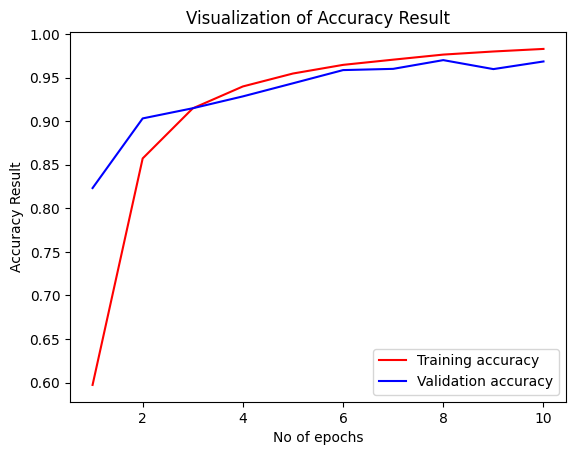

In [31]:
epochs=[i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred=model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 116s 210ms/step


(array([[9.9999988e-01, 5.6286744e-09, 8.8611314e-12, ..., 2.2534918e-15,
         8.7458811e-15, 1.6569517e-12],
        [9.9999976e-01, 2.4154613e-07, 4.2489964e-13, ..., 4.0823481e-17,
         4.2563226e-16, 2.1561778e-15],
        [1.0000000e+00, 1.4757889e-11, 1.1677819e-14, ..., 2.9005054e-21,
         2.8612225e-18, 3.5858520e-16],
        ...,
        [5.9165633e-15, 3.3968435e-16, 1.5237832e-11, ..., 5.4104415e-17,
         3.4482044e-16, 1.0000000e+00],
        [1.2281657e-13, 1.7973318e-16, 3.2348861e-12, ..., 7.6855683e-16,
         3.3994376e-15, 1.0000000e+00],
        [3.8653260e-17, 1.1698043e-17, 9.1491480e-16, ..., 9.7391974e-20,
         1.7996106e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [35]:
predicted_categories = tf.argmax(y_pred, axis=1)#axis=1 returns the index in column fashion

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

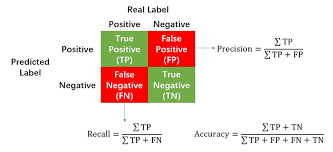

In [50]:

from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.96      0.95       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.96      0.96      0.96       502
                               Blueberry___healthy       0.92      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.92      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

In [52]:
cm = confusion_matrix(Y_true, predicted_categories)
cm, cm.shape

(array([[485,   5,   0, ...,   0,   0,   0],
        [  0, 493,   0, ...,   0,   0,   0],
        [  0,   0, 427, ...,   1,   1,   0],
        ...,
        [  0,   0,   0, ..., 488,   0,   0],
        [  0,   0,   0, ...,   1, 446,   0],
        [  0,   0,   0, ...,   0,   0, 477]], dtype=int64),
 (38, 38))

### confusion matrix visualization

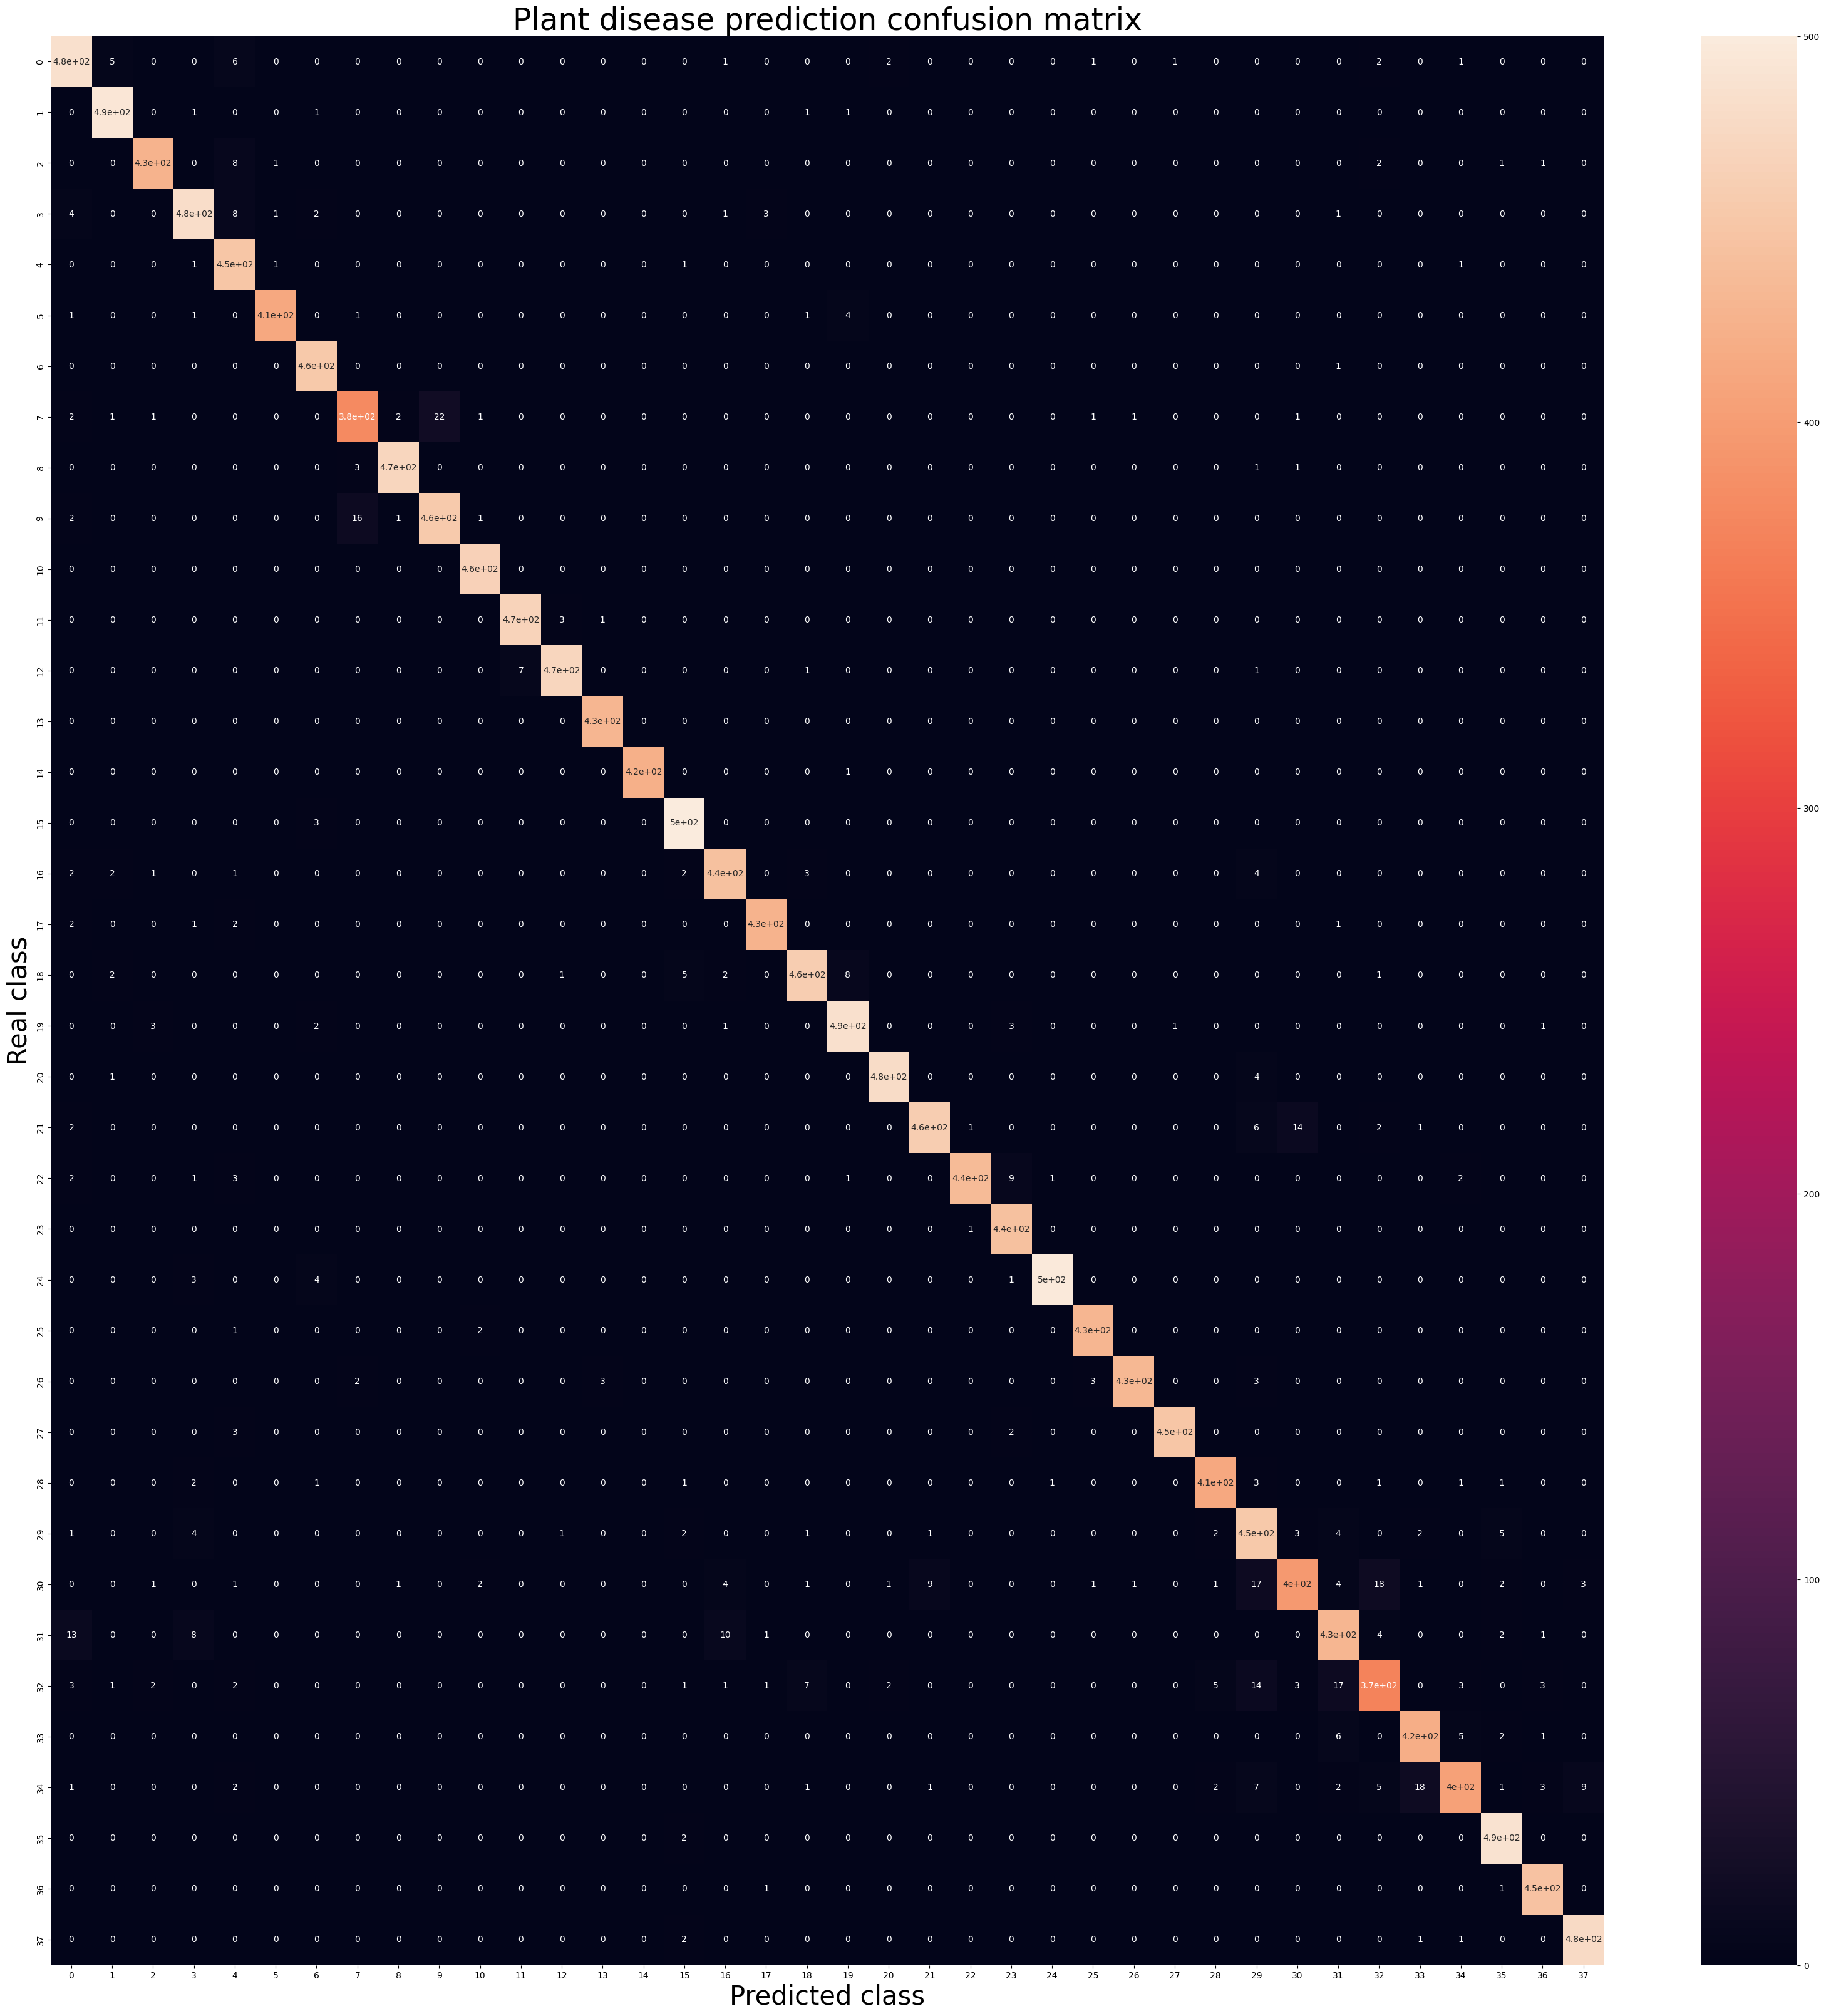

In [53]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel("Predicted class", fontsize=30)
plt.ylabel("Real class",fontsize=30)
plt.title("Plant disease prediction confusion matrix", fontsize=35)
plt.show()